In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter

def billions_formatter(x, pos):
  return f'{x/1e9:.0f}B'

In [4]:
df_gdp = pd.read_csv('/content/GDP.csv')
df_gdp = df_gdp.drop('Country Code', axis = 1)

In [5]:
df_gdp.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,3.201437e+10,3.326951e+10,3.632779e+10,...,9.859871e+11,1.006526e+12,9.273485e+11,8.851764e+11,1.021043e+12,1.007196e+12,1.000834e+12,9.275933e+11,1.081998e+12,1.169484e+12
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,2.056449e+10,2.055058e+10,1.999814e+10,1.801955e+10,1.889635e+10,1.841886e+10,1.890450e+10,2.014345e+10,1.458314e+10,NaN
3,Africa Western and Central,1.044764e+10,1.117321e+10,1.199053e+10,1.272769e+10,1.389811e+10,1.492979e+10,1.591084e+10,1.451058e+10,1.496824e+10,...,8.339481e+11,8.943225e+11,7.686447e+11,6.913634e+11,6.848988e+11,7.670257e+11,8.225384e+11,7.864600e+11,8.444597e+11,8.778633e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.024137e+10,6.568544e+10,1.067136e+11


In [6]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  266 non-null    object 
 1   1960     132 non-null    float64
 2   1961     134 non-null    float64
 3   1962     136 non-null    float64
 4   1963     136 non-null    float64
 5   1964     136 non-null    float64
 6   1965     147 non-null    float64
 7   1966     150 non-null    float64
 8   1967     153 non-null    float64
 9   1968     158 non-null    float64
 10  1969     158 non-null    float64
 11  1970     167 non-null    float64
 12  1971     170 non-null    float64
 13  1972     170 non-null    float64
 14  1973     170 non-null    float64
 15  1974     171 non-null    float64
 16  1975     173 non-null    float64
 17  1976     174 non-null    float64
 18  1977     177 non-null    float64
 19  1978     176 non-null    float64
 20  1979     177 non-null    float64
 21  1980     191 non

In [7]:
df_gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,1.320000e+02,1.340000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.470000e+02,1.500000e+02,1.530000e+02,1.580000e+02,1.580000e+02,...,2.590000e+02,2.600000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.570000e+02,2.510000e+02,2.330000e+02
mean,7.127083e+10,7.274846e+10,7.639516e+10,8.236303e+10,9.048173e+10,9.182705e+10,1.021722e+11,1.059782e+11,1.111099e+11,1.228651e+11,...,2.478710e+12,2.540064e+12,2.401518e+12,2.435921e+12,2.611092e+12,2.773992e+12,2.826371e+12,2.739712e+12,3.211350e+12,3.599791e+12
std,2.135947e+11,2.223876e+11,2.370024e+11,2.549141e+11,2.788048e+11,2.927440e+11,3.205033e+11,3.389517e+11,3.608829e+11,3.971955e+11,...,8.393417e+12,8.604724e+12,8.165753e+12,8.306057e+12,8.840816e+12,9.410423e+12,9.564901e+12,9.318754e+12,1.072358e+13,1.147951e+13
min,1.201203e+07,1.159202e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583510e+07,1.460000e+07,1.585000e+07,...,3.861589e+07,3.876097e+07,3.681193e+07,4.162906e+07,4.527661e+07,4.801522e+07,5.412320e+07,5.174657e+07,6.019637e+07,6.034939e+07
25%,5.288385e+08,5.361919e+08,5.429342e+08,5.687581e+08,5.731182e+08,5.963705e+08,6.499792e+08,6.316797e+08,6.583150e+08,7.116598e+08,...,8.486163e+09,9.034786e+09,8.752203e+09,8.620796e+09,9.319389e+09,1.002804e+10,1.038167e+10,9.754600e+09,1.150202e+10,1.567158e+10
50%,3.040214e+09,2.965945e+09,3.049474e+09,3.569338e+09,3.432187e+09,3.120871e+09,3.549759e+09,3.384063e+09,3.950426e+09,4.526894e+09,...,5.094967e+10,5.339986e+10,4.966768e+10,4.980725e+10,5.400064e+10,5.614400e+10,6.028350e+10,5.370680e+10,6.568544e+10,8.227481e+10
75%,3.103045e+10,3.128542e+10,3.161860e+10,3.617095e+10,3.401420e+10,2.851910e+10,3.082854e+10,3.108639e+10,3.451917e+10,3.766365e+10,...,5.390198e+11,5.478564e+11,5.020845e+11,5.057567e+11,5.369244e+11,5.524163e+11,5.439767e+11,5.470542e+11,7.400410e+11,9.911146e+11
max,1.384857e+12,1.449221e+12,1.550815e+12,1.671447e+12,1.830492e+12,1.994103e+12,2.164118e+12,2.302577e+12,2.484674e+12,2.740499e+12,...,7.763515e+13,7.975652e+13,7.521506e+13,7.648645e+13,8.144205e+13,8.650222e+13,8.772810e+13,8.521515e+13,9.688240e+13,1.005620e+14


In [10]:
def last_non_null(row):
  for year in reversed(df_gdp.columns[1:]):
    if not pd.isnull(row[year]):
      return row[year]
  return np.nan

  df_gdp['Most Recent'] = df_gdp.apply(last_non_null, axis=1)

In [11]:
col_to_remove = ['World','Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics',
                'Channel Islands', 'Caribbean small states', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
                'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Arab Rep.', 'Euro area',
                'European Union', 'Fragile and conflict affected situations', 'High income', 'Heavily indebted poor countries (HIPC)',
                'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified', 'Latin America & Caribbean (excluding high income)',
                'Latin America & Caribbean', 'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income',
                'Late-demographic dividend', 'Middle East & North Africa', 'Middle income', 'Middle East & North Africa (excluding high income)',
                'North America', 'OECD members', 'Other small states', 'Pre-demographic dividend', 'West Bank and Gaza', 'Pacific island small states',
                'Post-demographic dividend', 'South Asia', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa', 'Small states',
                'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)',
                'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (IDA & IBRD countries)','Upper middle income']

In [12]:
df_gdp_countries = df_gdp[~df_gdp['Country'].isin(col_to_remove)]

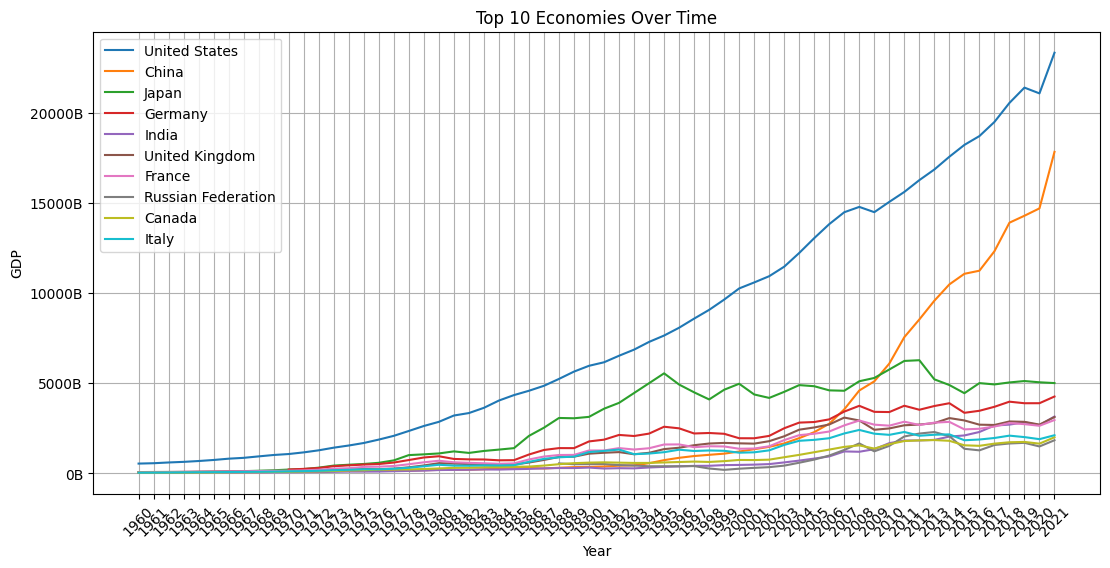

In [16]:
N = 10
top_countries = df_gdp_countries.nlargest(N, '2022')
plt.figure(figsize=(13, 6))
for country in top_countries['Country']:
  plt.plot(df_gdp_countries.columns[1:-1], df_gdp_countries[df_gdp_countries['Country'] == country].iloc[:, 1:-1].values.flatten(), label=country)

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title(f'Top {N} Economies Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.show()

In [19]:
world_gdp = df_gdp[df_gdp['Country'] == 'World']
# Drop only 'Country' column as 'Most Recent' is not in world_gdp
world_gdp = world_gdp.drop(['Country'], axis=1)
# Add 'Most Recent' column by calling the function again
world_gdp['Most Recent'] = world_gdp.apply(last_non_null, axis=1)
# Now you can drop it if you need
world_gdp = world_gdp.drop(['Most Recent'], axis=1)

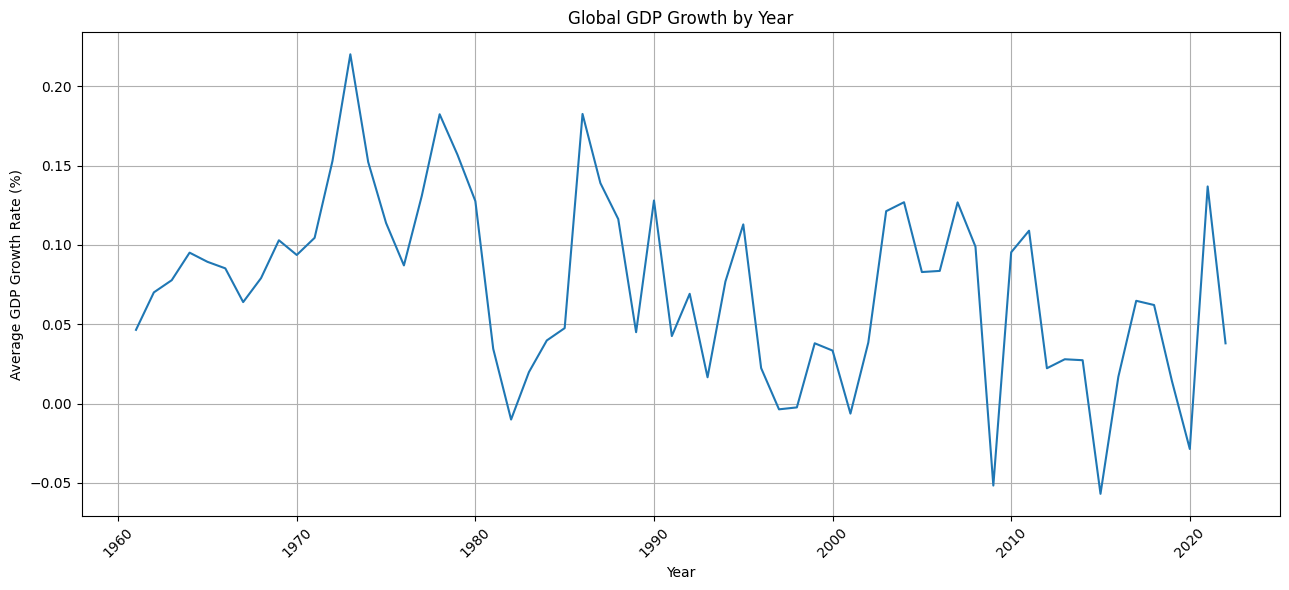

In [21]:
avg_growth_rates = []
years = range(1961, 2023)
for year in years:
  growth_rate = (world_gdp[str(year)] - world_gdp[str(year - 1)]) / world_gdp[str(year - 1)]
  avg_growth_rates.append(growth_rate)

plt.figure(figsize=(13, 6))
plt.plot(years, avg_growth_rates)
plt.xlabel('Year')
plt.ylabel('Average GDP Growth Rate (%)')
plt.title('Global GDP Growth by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

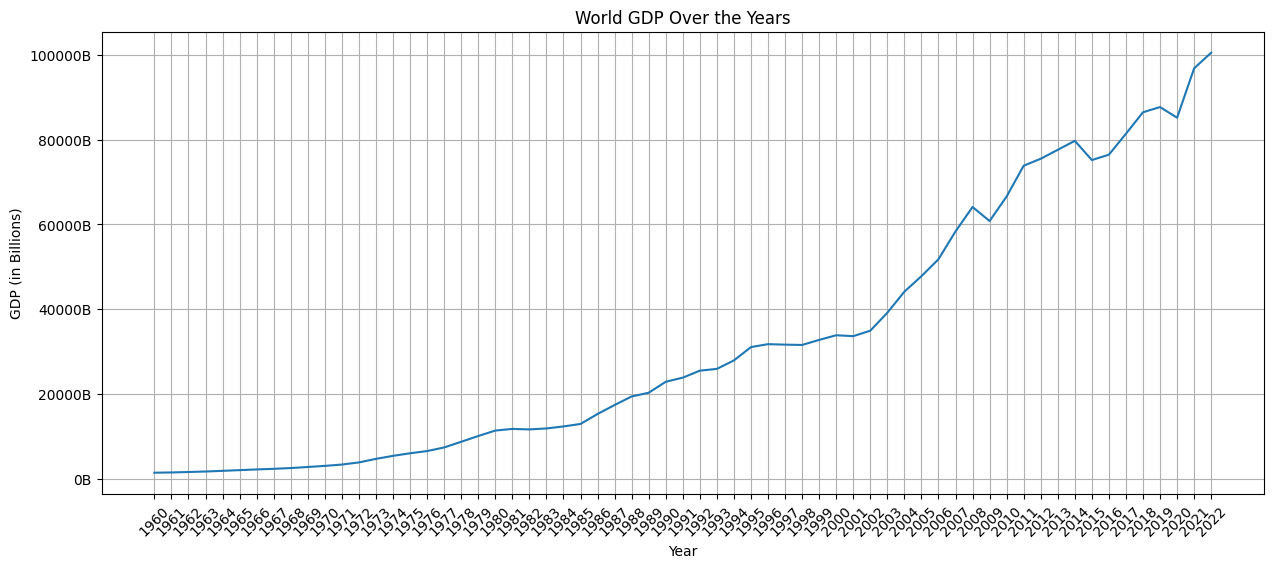

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(list(world_gdp), world_gdp.T[259].tolist())
plt.title('World GDP Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions)')
plt.grid(True)
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.show()

In [24]:
lower_years = []
previous_gdp = None
for year in world_gdp.columns:
  gdp = world_gdp.loc[259, year]
  if previous_gdp is not None and gdp < previous_gdp:
    lower_years.append(year)
  previous_gdp = gdp

print(f"GDP was lower than the year before in {', '.join(lower_years)}")

GDP was lower than the year before in 1982, 1997, 1998, 2001, 2009, 2015, 2020
